## TSF TASK 1 (Data Science & Business Analytics)

###### Prediction using Supervised ML, What will be predicted score if a student studies for 9.25 hrs/ day?

<b>BY - Aditya</b> 

In [1]:
### import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model

In [2]:
### get raw data 
data_link = "http://bit.ly/w-data"
df = pd.read_csv(data_link, sep=',')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
print("columns: ",  df.columns.values)

columns:  ['Hours' 'Scores']


In [5]:
print("DataFrame shape: ", df.shape)

DataFrame shape:  (25, 2)


In [6]:
print('removing duplicate rows....') 
df = df.drop_duplicates(keep='last')
df

removing duplicate rows....


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
print("removing bad data's ....")
cols = df.columns.values 
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

removing bad data's ....


In [8]:
df.nunique()

Hours     23
Scores    23
dtype: int64

In [9]:
print('columns type info...')
df.dtypes

columns type info...


Hours     float64
Scores      int64
dtype: object

### Generate descriptive statistics

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
print("correlation .... ")
df.corr()

correlation .... 


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### scatter plot

Text(0.5, 1.0, 'Hours VS Score')

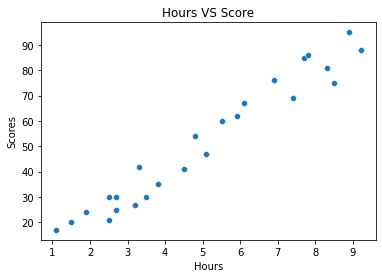

In [12]:
fg = sns.scatterplot(x='Hours', y='Scores', data=df)
fg.set_title('Hours VS Score')

### Checking for uniform distribution

/Users/ankitkaswan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

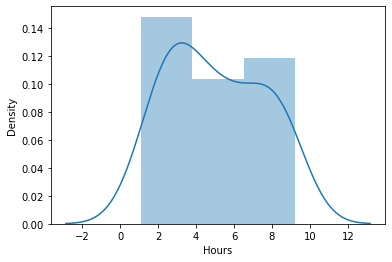

In [13]:
sns.distplot(df['Hours'])

### checking for outliers

<AxesSubplot:>

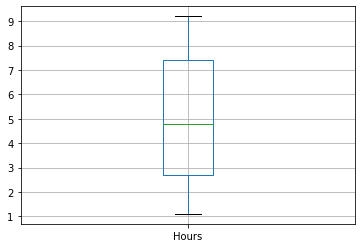

In [14]:
df.boxplot(column='Hours')

##### dependent and independent variables as in numpy array

In [15]:
X = df['Hours'].values[:, np.newaxis]
Y = df['Scores'].values[:, np.newaxis]

##### Preparing Data

In [16]:
X_train,X_val,Y_train,Y_val = sklearn.model_selection.train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_val shape: ', Y_val.shape)

X_train shape:  (20, 1)
X_val shape:  (5, 1)
Y_train shape:  (20, 1)
Y_val shape:  (5, 1)


#### Building Regression Model

In [18]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train,Y_train)
Pred_val = model.predict(X_val)

#### cofficient 

In [19]:
coef = model.coef_
coef = coef.reshape(1,)

#### Intercept

In [20]:
intercept = model.intercept_
intercept = intercept.reshape(1,)

##### differnce between original and predicted values for validation set

In [21]:
df1 = pd.DataFrame({'original':Y_val.flatten(),'predicted':Pred_val.flatten()}) 
df1

,original,predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


#### BEST FIT LINE

In [22]:
print("Equation of the best fit line is: Y = {}*X + {}".format(coef.round(2), intercept.round(2)))

Equation of the best fit line is: Y = [9.68]*X + [2.83]


#### MAKING PREDICTION FOR GIVEN CASE

In [23]:
x_test = [[9.25]]
y_test = model.predict(x_test)

In [24]:
print("The predicted score if a student studies for 9.25 hrs/ day is {}".format(y_test.round(2).flatten()))

The predicted score if a student studies for 9.25 hrs/ day is [92.39]


#### VISUALIZING THE BEST FIT LINE

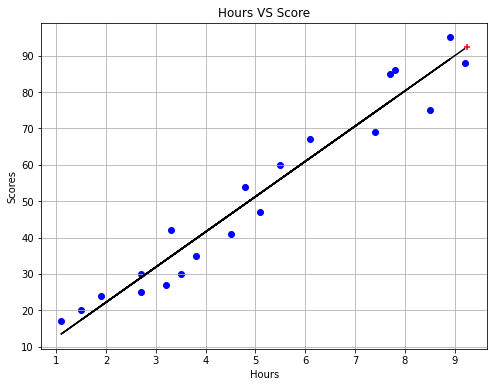

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, color='b') #Training data
plt.scatter(x_test, y_test, color='r', marker='+')  # Target data
plt.plot(X_train, model.predict(X_train), color='black') #best fit line
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Score')
plt.grid()

#### MODEL EVALUATION

In [26]:
print('Mean Absolute Error is : {}'.format(sklearn.metrics.mean_absolute_error(Y_val,Pred_val).round(2)))
print('Mean Squared Error is : {}'.format(sklearn.metrics.mean_squared_error(Y_val,Pred_val).round(2)))
print('Root Mean Squared Error is : {}'.format(np.sqrt(sklearn.metrics.mean_squared_error(Y_val,Pred_val)).round(2)))

Mean Absolute Error is : 3.92
Mean Squared Error is : 18.94
Root Mean Squared Error is : 4.35


### CONCLUSION

##### The predicted score of a student who studies for 9.25 hrs/ day is around 92.